# Most Popular Language, Database, Platform and WebFramework Among Developer

There are five steps involved in the CRISP-DM process which we follow to get the analysis of stackoverflow survey result 2019.
1. Business Understanding 
2. Data Understanding 
3. Prepare Data 
4. Data Modeling 
5. Evaluate the Results 

In the stackover flow survey there are many questions asked among the developer communitite. In this article I would like to
analyis most popular Language, Database, Platform and WebFramework.

Every year stackover flow take a online survey around the world to know most popular things going on. Recently Stackover flow 
released results of the year 2019. 

I would like to share my findings on the following topics:
    1. Which is the most popular Programming language, Database, Platform and Web Framework, which currently developer works with?
    
     2. Which programming language paid the highest salary (Every Country having different currency but all salary is Converted into USD Dollar as per exchange rate on 2019-02-01, assuming 12 working months and 50 working weeks.)? 
 
    3. How many years’ experience they have to do programming?


In [1]:
#Import Required library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

First for data understanding read the csv file and understand which data type and information related to that data in the given
survey file.

In [2]:
#Import Required Dataset (Here we are using stackoverflow survey 2019)
df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

Question 1: Which is the most popular Programming language, Database, Platform and WebFramework which currently developer works
with?

To answer this question we only select required columns form the dataset and our main focus is based on professional developer
only so we can filter out dataset accordingly. 

All rows were dropped where the mainbranch column did not contain the category "I am a developer by profession" as I am only intrested to know about popular things among developers only. This way help me to deal with Nan value as well as categorical values.

In [3]:
#Choose only required column from the main dataset
q1 = df[['MainBranch','LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith', 'WebFrameWorkedWith']]
q1 = q1[q1.MainBranch == "I am a developer by profession"]
q1.head()

,MainBranch,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith
3,I am a developer by profession,C;C++;C#;Python;SQL,MySQL;SQLite,Linux;Windows,NaN
4,I am a developer by profession,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Couchbase;MongoDB;MySQL;Oracle;PostgreSQL;SQLite,Android;Linux;MacOS;Slack;Windows,Django;Express;Flask;jQuery;React.js;Spring
6,I am a developer by profession,HTML/CSS;JavaScript,NaN,MacOS;Windows,React.js
8,I am a developer by profession,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,DynamoDB;PostgreSQL;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,Express;Ruby on Rails;Other(s):
9,I am a developer by profession,C#;Go;JavaScript;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Linux;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...


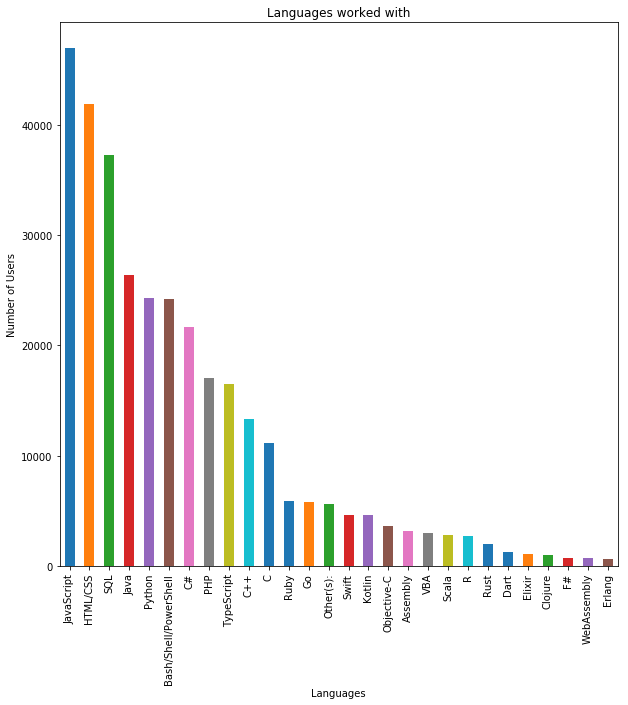

In [4]:
#Most Languages worked with such as Python, Java, Scala etc.
languages = q1['LanguageWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
languages.plot(kind="bar")
plt.title("Languages worked with");
plt.xlabel('Languages')
plt.ylabel('Number of Users')
plt.savefig('languages')

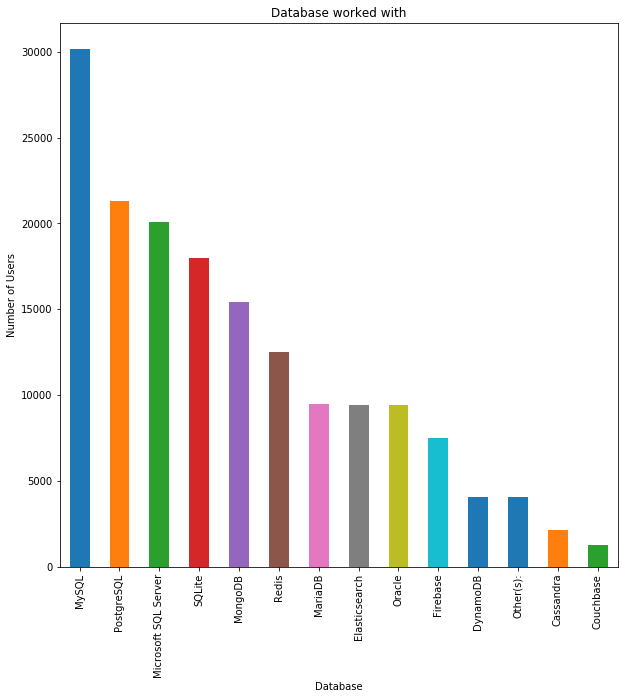

In [5]:
#Most Database worked with MySQl, Oracle, MongoDb etc.
databases = q1['DatabaseWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
databases.plot(kind="bar")
plt.title("Database worked with");
plt.xlabel('Database')
plt.ylabel('Number of Users')
plt.savefig('databases')

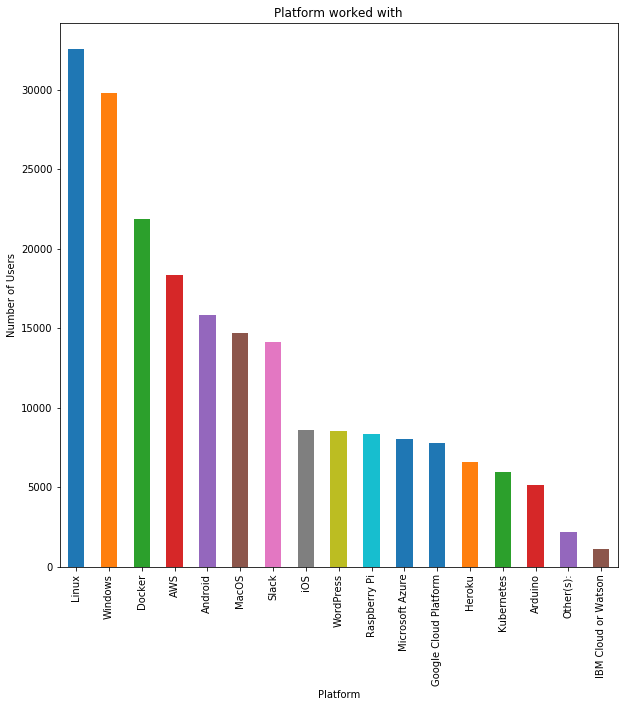

In [6]:
#Most platform worked with Linux, Microsoft, Andriod etc.
platform = q1['PlatformWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
platform.plot(kind="bar")
plt.title("Platform worked with");
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.savefig('platform')

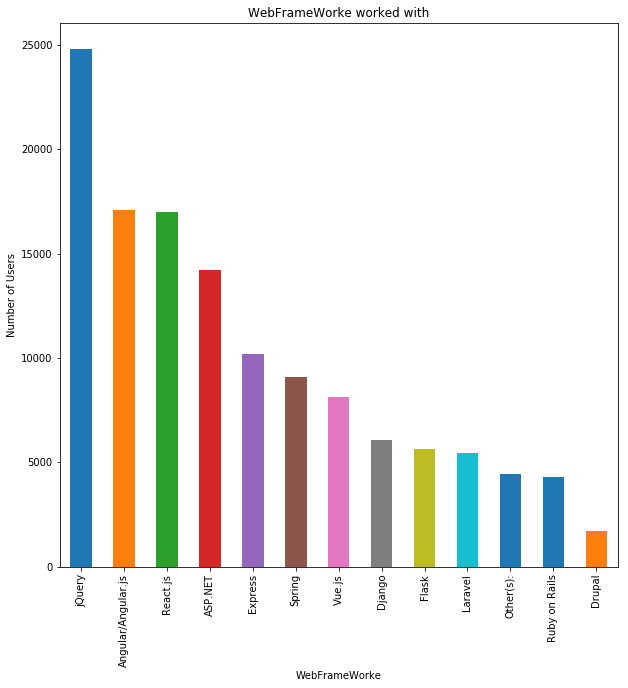

In [7]:
#Most webframework worked with Django, Ruby on Rail, Angular etc.
webframework = q1['WebFrameWorkedWith'].str.split(';', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
webframework.plot(kind="bar")
plt.title("WebFrameWorke worked with");
plt.xlabel('WebFrameWorke')
plt.ylabel('Number of Users')
plt.savefig('webframework')

2. Which programming language paid the highest salary (Converted into USD Dollar)?

To answer this question we only used two columns and results shows USD dollar. 

All rows were dropped where the mainbranch column did not contain the category "I am a developer by profession" as I am only intrested to know about popular things among developers only. This way help me to deal with Nan value as well as categorical values.In the raws convertedComp and LanguageWorkedWith having Nan Values which I would like to drop.Because I want to find the correlation between two and therefroe to remove this values not impact our anlaysis.

In [8]:
#Select required file and our main goal is to with professional developer so we can filter out others
q2 = df[['MainBranch', 'LanguageWorkedWith', 'ConvertedComp']]
q2 = q2[q2.MainBranch == "I am a developer by profession"]

q2 = q2.drop('MainBranch', 1)
q2 = q2.dropna(subset=['ConvertedComp', 'LanguageWorkedWith'], axis=0)

q2.head()

,LanguageWorkedWith,ConvertedComp
3,C;C++;C#;Python;SQL,61000.0
8,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,95179.0
9,C#;Go;JavaScript;Python;R;SQL,13293.0
12,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,90000.0
13,C++,57060.0


In [18]:
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    row_accumulator = []

    def splitListToRows(row, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)

    df.apply(splitListToRows, axis=1, args = (separator, ))
    new_df = pd.DataFrame(row_accumulator)
    return new_df

In [19]:
split_languages = splitDataFrameList(q2,'LanguageWorkedWith', ';')
split_languages.head()

,ConvertedComp,LanguageWorkedWith
0,61000.0,C
1,61000.0,C++
2,61000.0,C#
3,61000.0,Python
4,61000.0,SQL


In [20]:
q2_answer = split_languages.groupby(['LanguageWorkedWith']).mean()['ConvertedComp'].sort_values()
q2_answer.head(10)

LanguageWorkedWith
PHP           101627.329331
Dart          119302.097118
Java          121873.609334
Kotlin        122818.317094
HTML/CSS      124642.378675
C             126995.403768
JavaScript    127342.917147
SQL           127544.849019
C++           129959.794753
Swift         130931.296734
Name: ConvertedComp, dtype: float64

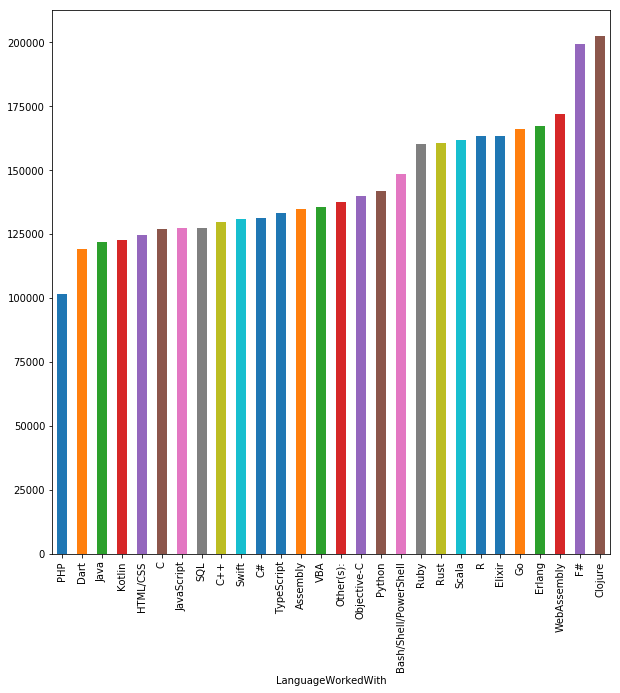

In [59]:
plt.figure(figsize=(10,10))
q2_answer.plot(kind = 'bar')
plt.savefig('LanguageWorkedWith Vs Salary')

3. How many years experience they have to do programming?  

For analysis of this question we used only required column and igonore all other columns. 

All rows were dropped where the mainbranch column did not contain the category "I am a developer by profession" as I am only intrested to know about popular things among developers only. This way help me to deal with Nan value as well as categorical values.In the raws convertedComp and LanguageWorkedWith having Nan Values which I would like to drop.Because I want to find the correlation between two and therefroe to remove this values not impact our anlaysis.

Here I am dealing with the numerical values therefor I have converted YearsCode column to numeric values. 

In [51]:
#Select required file and our main goal is to with professional developer so we can filter out others  
#our focus is how many years they do a coding 
q3 = df[['MainBranch', 'LanguageWorkedWith', 'YearsCode']]
q3 = q3[q3.MainBranch == "I am a developer by profession"]
q3[['YearsCode']] = q3[['YearsCode']].apply(pd.to_numeric, errors='coerce')
q3.head()

,MainBranch,LanguageWorkedWith,YearsCode
3,I am a developer by profession,C;C++;C#;Python;SQL,3.0
4,I am a developer by profession,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,16.0
6,I am a developer by profession,HTML/CSS;JavaScript,6.0
8,I am a developer by profession,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,12.0
9,I am a developer by profession,C#;Go;JavaScript;Python;R;SQL,12.0


In [52]:
q3 = q3.drop('MainBranch', 1)
q3 = q3.dropna(subset=['YearsCode', 'LanguageWorkedWith'], axis=0)

q3.head()

,LanguageWorkedWith,YearsCode
3,C;C++;C#;Python;SQL,3.0
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,16.0
6,HTML/CSS;JavaScript,6.0
8,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,12.0
9,C#;Go;JavaScript;Python;R;SQL,12.0


In [53]:
split_languages1 = splitDataFrameList(q3,'LanguageWorkedWith', ';')
split_languages1.head()

,LanguageWorkedWith,YearsCode
0,C,3.0
1,C++,3.0
2,C#,3.0
3,Python,3.0
4,SQL,3.0


In [56]:
q3_answer = split_languages1.groupby(['LanguageWorkedWith']).mean()['YearsCode'].sort_values(ascending = True)
q3_answer.head(10)

LanguageWorkedWith
Dart          11.597888
PHP           12.034477
Kotlin        12.071773
TypeScript    12.312275
Java          12.366783
HTML/CSS      12.461288
JavaScript    12.528078
R             12.780903
Python        12.864359
Swift         12.877117
Name: YearsCode, dtype: float64

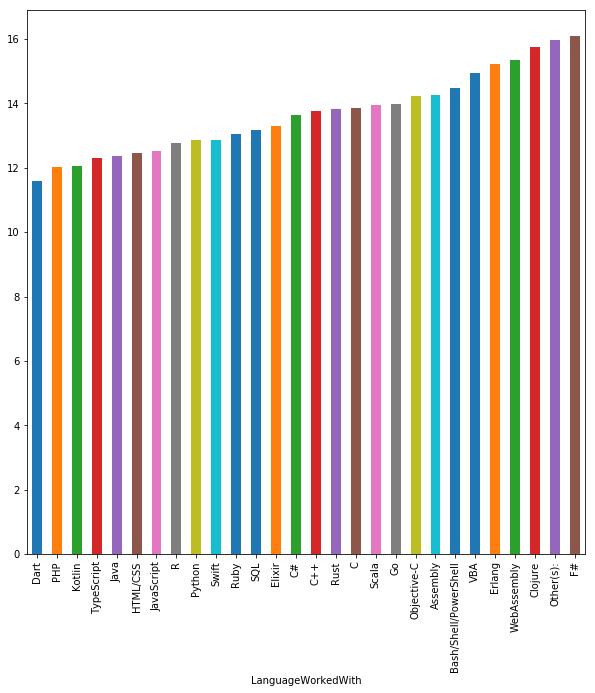

In [60]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('LanguageWorkedWith Vs Years of Code')

# Conclusion 

1. JavaScript, HTML/CSS, SQL are the most used language used by proessionals along with this Java and Python 
are the most valuable languages.Form the webframework results we can say that javascript based frame work lead the most which 
proves javascript is the most demanding lanuage. 

    People are more likely to use open source software and databases which we cleary find from the resutls. Linux as a platform leads and MySql as a database query lanugage. 
    

2. As observed from the bar chart, the salries converted into USD from the county around the world which shows Most Popular 
languages having lower salary expectation and least popular and new demanding languages having high demands and developer achieve
more salry per year.

3. For lastest technology working professional have spend more time including their education and coding experience. Which languages
are older having more number of devlopers available. It shows it takes many years to master and develop skill for adopt 
new technology. 